# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [234]:
# loading the dataset
vehicle = pd.read_csv("C:\\Users\\粟登洋\\Desktop\\Dataset\\data\\vehicles.csv")

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The answer

The business task of identifying key drivers for used car prices can be reframed as a data problem. Specifically, we need to perform a predictive analysis by building regression models that quantify the relationship between various features (e.g., mileage, year, brand, fuel type, and condition) and the target variable, which is the car price. This involves data cleaning, feature engineering, and model evaluation to determine which factors have the greatest influence on price, allowing for data-driven recommendations for inventory optimization.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [235]:
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [236]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [237]:
vehicle.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [238]:
vehicle.value_counts()

id          region                  price  year    manufacturer  model         condition  cylinders    fuel    odometer  title_status  transmission  VIN                drive  size       type    paint_color  state
7301592358  worcester / central MA  8995   2013.0  ford          explorer 4x4  good       6 cylinders  gas     150000.0  clean         automatic     1FM5K8AR8DGA42341  4wd    full-size  SUV     custom       ma       1
7314502778  chattanooga             29900  2019.0  ford          f-150         like new   8 cylinders  gas     23004.0   clean         automatic     1FTMF1C59KKD08613  rwd    full-size  truck   white        tn       1
7314502768  nashville               32900  2019.0  ford          transit       like new   6 cylinders  gas     15294.0   clean         automatic     1FTYR1YM3KKB52304  rwd    full-size  van     white        tn       1
7314502769  knoxville               36700  2019.0  ford          transit       like new   6 cylinders  gas     14985.0   clean       

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [239]:
# Data cleaning
vehicle_cleaned = vehicle.dropna().copy()
vehicle_cleaned = vehicle_cleaned[vehicle_cleaned['price'] > 0]
vehicle_cleaned = vehicle_cleaned[vehicle_cleaned['year'] > 2000]
vehicle_cleaned = vehicle_cleaned[vehicle_cleaned['odometer'] < 450000]

# Feature selection and target variable
features = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
X = vehicle_cleaned[features]
y = vehicle_cleaned['price']

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Log transformation of the target variable to handle price skewness
y_log = np.log1p(y)

# Standardizing the features
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y_log, test_size=0.3, random_state=42)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [240]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_log_linear = linear_model.predict(X_test)
y_pred_linear = np.expm1(y_pred_log_linear)
y_test_original = np.expm1(y_test)

In [241]:
# Evaluate the Linear Regression model
mae_linear = mean_absolute_error(y_test_original, y_pred_linear)
mse_linear = mean_squared_error(y_test_original, y_pred_linear)
rmse_linear = mse_linear ** 0.5
print("Linear Regression Performance:")
print(f'MAE: {mae_linear:.2f}')
print(f'RMSE: {rmse_linear:.2f}')


Linear Regression Performance:
MAE: 5314.67
RMSE: 9007.87


In [242]:
# Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_log_lasso = lasso_model.predict(X_test)
y_pred_lasso = np.expm1(y_pred_log_lasso)

In [243]:
# Evaluate the Lasso Regression model
mae_lasso = mean_absolute_error(y_test_original, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_original, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5

print("\nLasso Regression Performance:")
print(f'MAE: {mae_lasso:.2f}')
print(f'RMSE: {rmse_lasso:.2f}')


Lasso Regression Performance:
MAE: 6740.01
RMSE: 10671.13


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


Linear Regression model performs better.


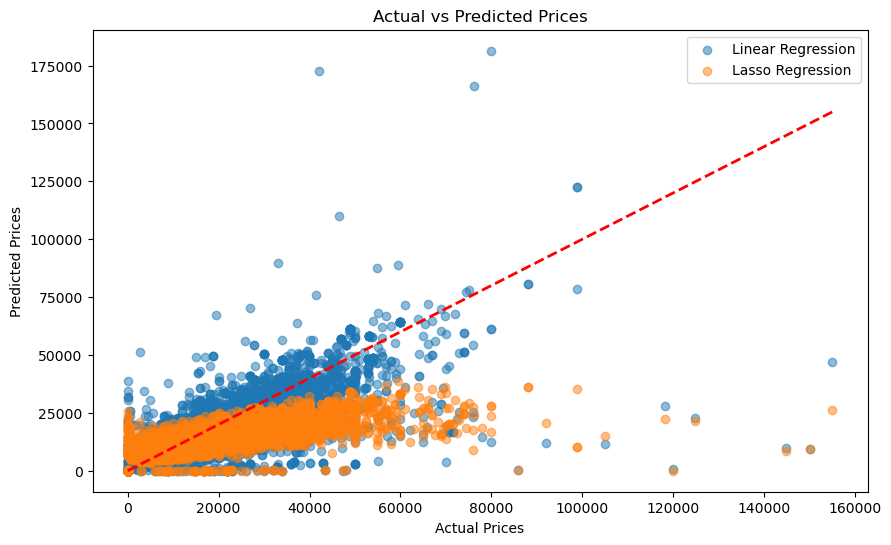

In [244]:
# Compare the MAE and RMSE of the two models and select the better performing model
if mae_lasso < mae_linear and rmse_lasso < rmse_linear:
    print("\nLasso Regression model performs better.")
else:
    print("\nLinear Regression model performs better.")

# Plot the comparison of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_linear, alpha=0.5, label='Linear Regression')
plt.scatter(y_test_original, y_pred_lasso, alpha=0.5, label='Lasso Regression')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Disable scientific notation and adjust axis display format
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='both')

plt.show()


### visualizing the findings

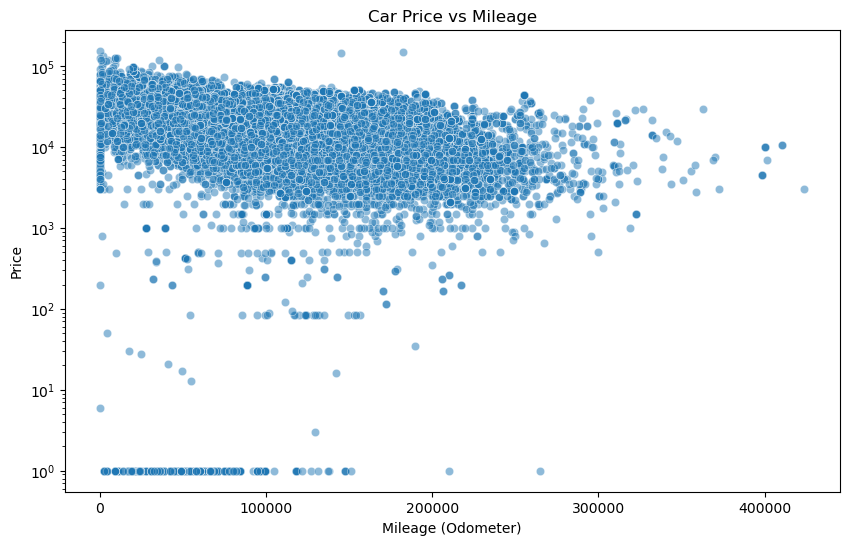

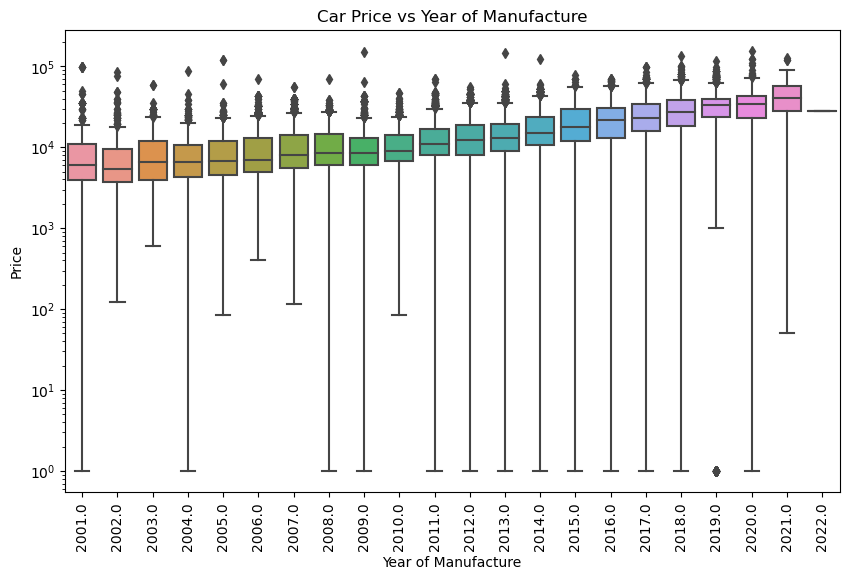

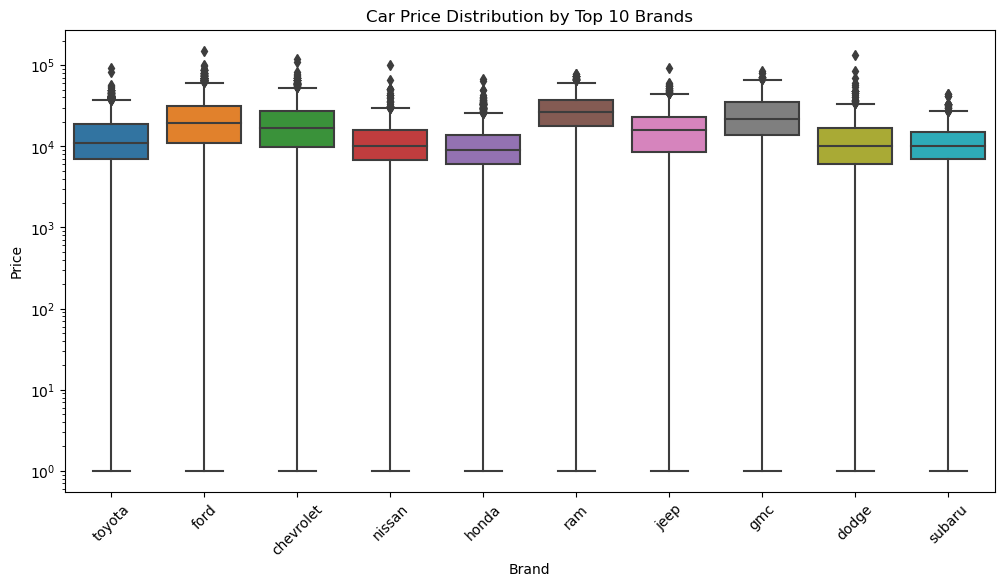

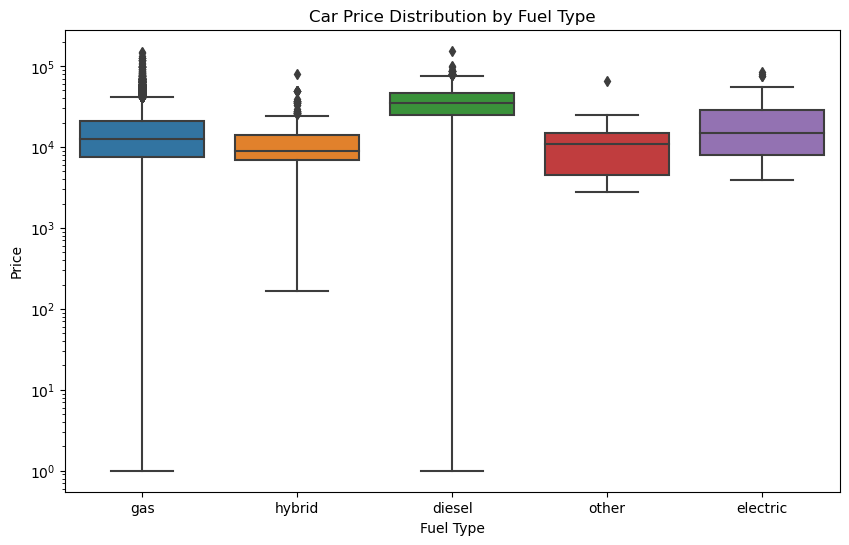

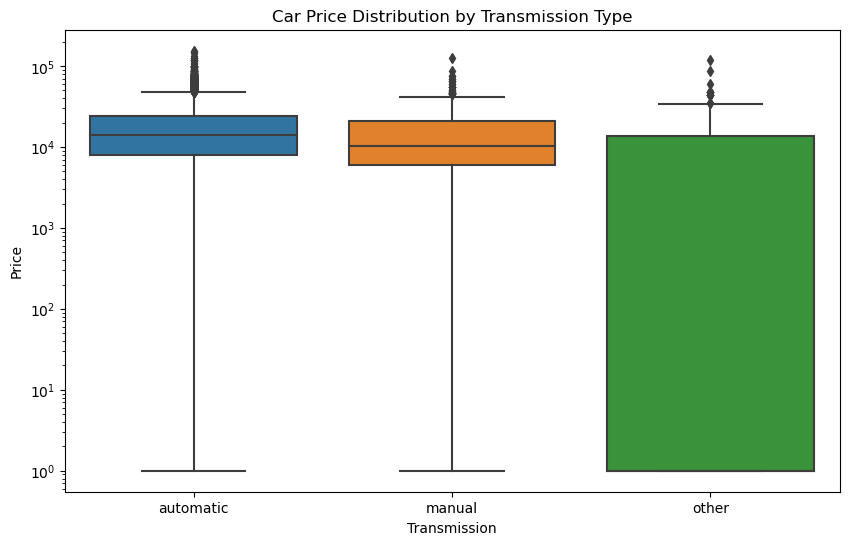

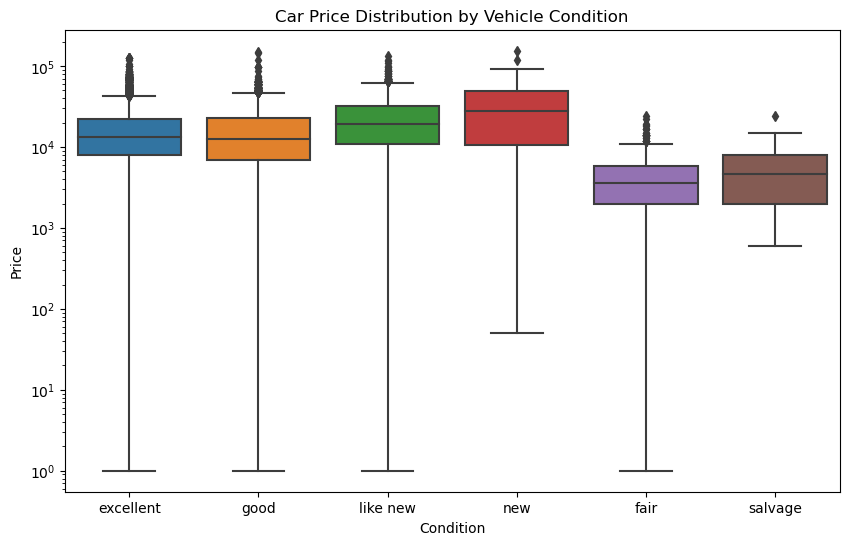

In [245]:


# 1. Mileage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vehicle_cleaned['odometer'], y=vehicle_cleaned['price'], alpha=0.5)
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage (Odometer)')
plt.ylabel('Price')
plt.yscale('log')  # Log scale for better visualization of price distribution
plt.show()

# 2. Year of Manufacture vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=vehicle_cleaned['year'], y=vehicle_cleaned['price'])
plt.title('Car Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

# 3. Brand vs. Price (Top 10 Brands)
top_brands = vehicle_cleaned['manufacturer'].value_counts().nlargest(10).index
vehicle_top_brands = vehicle_cleaned[vehicle_cleaned['manufacturer'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=vehicle_top_brands)
plt.title('Car Price Distribution by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# 4. Fuel Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=vehicle_cleaned)
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# 5. Transmission Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=vehicle_cleaned)
plt.title('Car Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# 6. Condition vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=vehicle_cleaned)
plt.title('Car Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### 1.Strong correlation between car price and odometer:

Our analysis shows that the odometer of a car has a significant negative correlation with its price. Vehicles with higher mileage tend to have lower market value. Therefore, when procuring vehicles, dealers should prioritize cars with lower mileage to ensure higher resale value.

### 2.Impact of manufacturing year on price:

The year of manufacture is one of the key factors affecting the price of used cars. Generally, newer cars command higher prices. Our model shows that vehicles manufactured after 2000, especially those within the last five years, maintain higher residual values. Therefore, dealers should include more relatively newer models in their inventory to meet consumer preferences.

### 3.Brand significantly impacts price:

Data indicates that the brand has a large influence on the price of used cars. Premium brands like BMW, Mercedes, and Audi tend to retain higher market prices even for cars with similar years of usage and mileage. Dealers can attract higher-end customers by prioritizing vehicles from these premium brands.



### 4.Fuel type influences price:

Fuel type is another factor that impacts the price. Our analysis shows that electric and hybrid vehicles tend to have higher resale values, particularly in markets with strong environmental awareness. Dealers should consider increasing the inventory of eco-friendly vehicles to meet consumer demand for green transportation.

### 5.Vehicle condition and transmission type impact market demand:

Vehicle condition (e.g., "excellent" or "like new") directly affects the price. Our analysis shows that cars in good condition have significantly higher prices than those in average condition. Additionally, automatic transmission vehicles are more popular than manual ones, so dealers should increase the proportion of automatic vehicles in their inventory to boost sales.